In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [8]:
n = 'n'
m = 'm'
p = 'p'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

In [3]:
greedy = pd.read_csv('accuracy-greedy.csv')
local = pd.read_csv('accuracy-local.csv')
grasp = pd.read_csv('accuracy-grasp.csv')

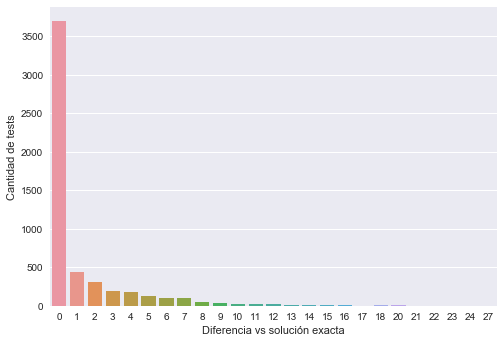

Porcentaje de error: 30.98%


,n,m,diff
max,40.000000,390.000000,27.000000
mean,30.449524,119.549543,1.229147
std,7.789745,92.072989,2.669999


In [108]:
g = sns.countplot(x=diff, data=greedy)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

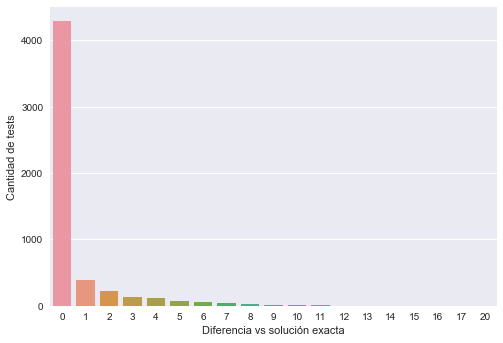

Porcentaje de error: 19.97%


,n,m,diff
max,40.000000,390.000000,20.000000
mean,30.449524,119.549543,0.615040
std,7.789745,92.072989,1.697704


In [107]:
g = sns.countplot(x=diff, data=local)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

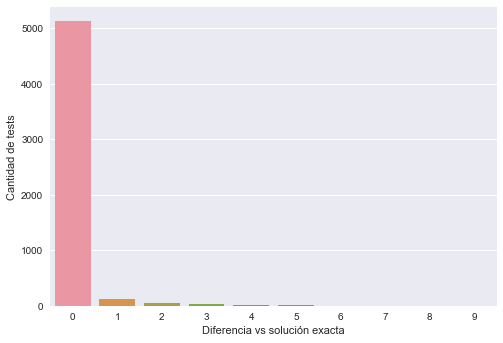

In [109]:
test = grasp[(grasp.p == 0.6) & (grasp.it == 15)]
g = sns.countplot(x=diff, data=test)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

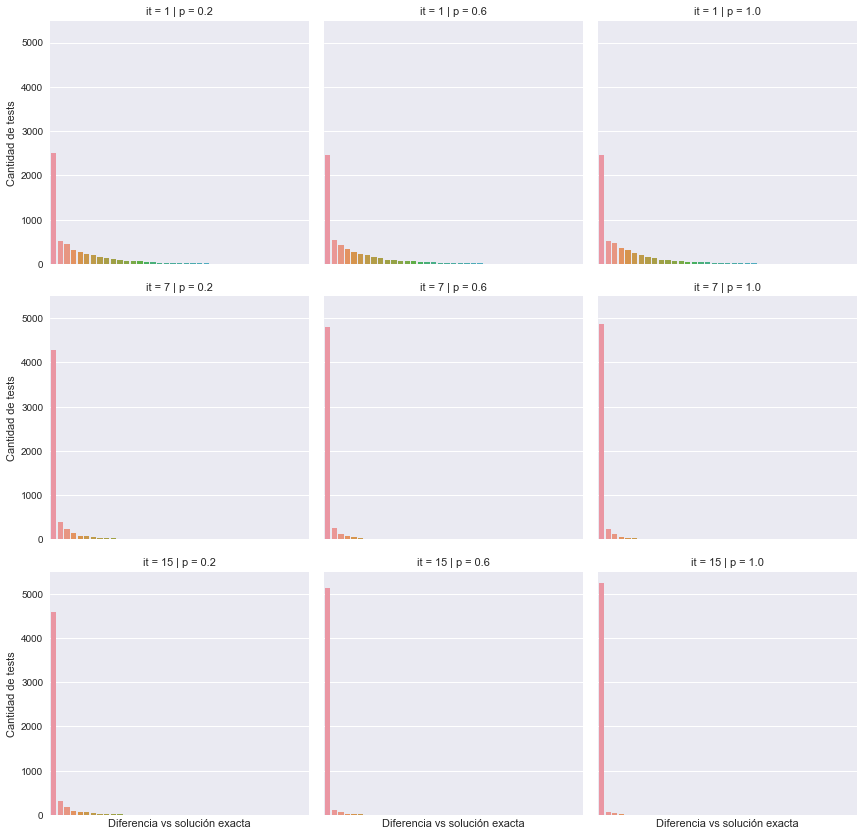

In [104]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count",
    facet_kws=dict()
)

g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [113]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

grasp_test = grasp_test.drop(n,1).drop(m,1)
graspCopy = grasp_test.copy()
graspCopy.columns = [p,it,'dif']

grasp_test = grasp_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp_test = grasp_test.assign(error=1)

for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its)].shape
        errcount, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its) & (graspCopy.dif > 0)].shape
        grasp_test.loc[(grasp_test.p == ps) & (grasp_test.it == its), 'error'] = errcount/count
grasp_test

p  it diff                         error
            max      mean       std          
0  0.2   1   39  3.046650  4.774386  0.531069
1  0.2   7   27  0.617279  1.740223  0.200597
2  0.2  15   16  0.391491  1.299830  0.143310
3  0.6   1   32  3.046091  4.679572  0.540213
4  0.6   7   16  0.256764  1.014885  0.103377
5  0.6  15    9  0.087330  0.528601  0.042172
6  1.0   1   46  3.003359  4.645715  0.541519
7  1.0   7   12  0.212726  0.875136  0.093114
8  1.0  15    9  0.052435  0.432504  0.024072

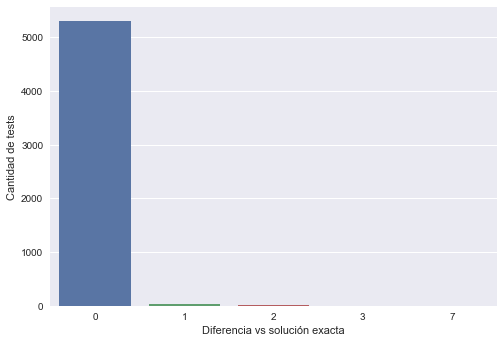

Porcentaje de error: 1.04%
56


,n,m,p,it,diff
max,40.000000,390.000000,0.6,50.0,7.000000
mean,30.449524,119.549543,0.6,50.0,0.016608
std,7.789745,92.072989,0.0,0.0,0.189064


In [110]:
grasp50 = pd.read_csv('accuracy-grasp50.csv')

g = sns.countplot(x=diff, data=grasp50)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp_count = grasp50.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))
print(grasp_sum - grasp_count['count'][0])

grasp50.agg(['max', 'mean', np.std])